In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [232]:
to_meV = 27211.6
to_nano = 0.05292
dx = 0.5 / to_nano
l = 100
bariera = 10
V_b = 30 / to_meV
m_0 = 1
m = 0.067 * m_0

In [237]:
def norm(arr):
    I = np.sum((np.abs(arr)**2)*dx)
    return arr / np.sqrt(I)

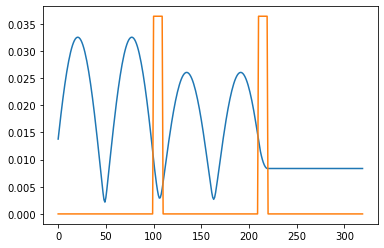

In [287]:
def ψx(arr, E, V):
    arr = np.array(arr, dtype=np.csingle)
    for i in range(len(arr)-2)[::-1]:
        arr[i] = - 2 * m * (E-V[i+1]) * dx**2 * arr[i+1] - arr[i+2] + 2 * arr[i+1]
    return arr

ψ = np.zeros(3*l + 2*bariera, dtype=np.csingle)
E = 7 / to_meV
q = np.sqrt(2*m*E)
V = np.zeros(len(ψ), dtype=np.csingle)

V[100:110] = V_b
V[210:220] = V_b

ψ[-1] = 1
ψ[-2] = np.exp(-complex(0,1) * q * dx)

ψ = ψx(ψ, E, V)

plt.plot(norm(np.abs(ψ)))
plt.plot(norm(V)/2)


In [274]:
def get_A(arr):
    A = (arr[0]*np.exp(1j*q*dx)- arr[1]*np.exp(1j*q*2*dx)) / (np.exp(1j*q*dx)**2 - np.exp(1j*q*2*dx)**2)
    return A

def get_B(arr):
    B = - (-arr[1]*np.exp(1j*q*dx) + arr[0]*np.exp(1j*q*2*dx))*np.exp(3*1j*q) / (np.exp(1j*q*dx)**2 - np.exp(1j*q*2*dx)**2)
    return B

def get_T(arr):
    return 1/np.abs(get_A(arr))**2

def get_R(arr):
    return (np.abs(get_B(arr))**2) / (np.abs(get_A(arr))**2)

In [253]:
R = (np.abs(get_B(ψ))**2) / (np.abs(get_A(ψ))**2)
T = 1/np.abs(get_A(ψ))**2
(R, T)

(0.7675176654022942, 0.232488127085769)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1390: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'X [nm]')

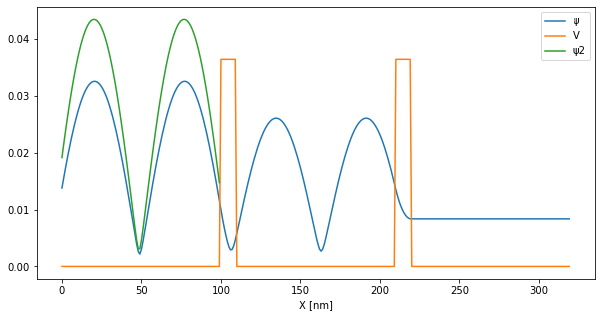

In [265]:
A = get_A(ψ)
B = get_B(ψ)

X = np.arange(100)*dx
ψ2 = np.zeros(100)
ψ2 = A * np.exp(1j*q*X) + B * np.exp(-1j*q*X)

plt.figure(figsize=(10,5))
plt.plot(norm(np.abs(ψ)), label='ψ')
plt.plot(norm(V)/2, label='V')
plt.plot(norm(np.abs(ψ2)), label='ψ2')
plt.legend()
plt.xlabel('X [nm]')

In [295]:
temp_ψ = np.zeros(3*l + 2*bariera, dtype=np.csingle)
temp_ψ[-1] = 1
temp_ψ[-2] = np.exp(-complex(0,1) * q * dx)

En = np.linspace(0.001,50,1000)/to_meV
arr_T = np.zeros(len(En))
arr_R = np.zeros(len(En))

for i in range(len(En)):
    temp_ψ = ψx(temp_ψ, En[i], V)
    arr_T[i] = get_T(temp_ψ)
    arr_R[i] = get_R(temp_ψ)
    

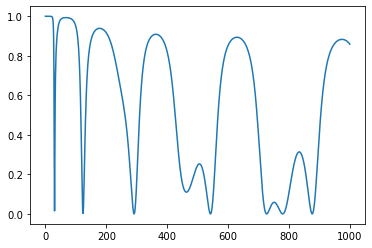

In [296]:
plt.plot(arr_R)

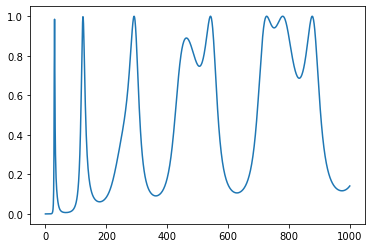

In [297]:
plt.plot(arr_T)